In [1]:
# Abigail S. Moreno, 183392
# Keith Adrian Santos, 184423
# Anton Castillo, 172575
# October 18, 2021

# I/we certify that this submission complies with the DISCS Academic Integrity
# Policy.

# If I/we have discussed my/our Python language code with anyone other than
# my/our instructor(s), my/our groupmate(s), the teaching assistant(s),
# the extent of each discussion has been clearly noted along with a proper
# citation in the comments of my/our program.

# If any Python language code or documentation used in my/our program
# was obtained from another source, either modified or unmodified, such as a
# textbook, website, or another individual, the extent of its use has been
# clearly noted along with a proper citation in the comments of my/our program.

################################################################################

# Exploratory Data Analysis Hands-on

In [2]:
# !pip install pickle-mixin nltk sklearn

In [1]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\keith\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\keith\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\keith\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [2]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nltk import word_tokenize, pos_tag
from nltk.corpus import stopwords
from nltk.corpus import wordnet as wn
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
stopwords = stopwords.words('english')
from collections import defaultdict

pd.set_option('display.max_rows', None)

## Preparing the Tweets

In [3]:
# read tweets df from previous activity
shangchi_df = pd.read_csv("ShangChiTweets.csv", index_col=None, header=0)
shangchi_df = shangchi_df.dropna(axis=1)

# remake the dataframe with only the relevant columns 
shangchi_df = pd.concat([shangchi_df["date"], shangchi_df["time"],shangchi_df["username"],shangchi_df["tweet"],
                         shangchi_df["language"]], axis=1)

shangchi_df.head(5)

C:\Users\keith\Desktop\Programming Notes\Social Computing Class\soccompwinvenv\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,date,time,username,tweet,language
0,10/15/2021,7:57:56,wolforbewolfed,Finally saw Shang Chi!!! It was dope. Dragons ...,en
1,10/15/2021,7:57:11,knoxvfx,pq coño está esto en disney+ y no shang chi de...,es
2,10/15/2021,7:55:28,ging_hive,one of these days i will watch shang chi,en
3,10/15/2021,7:55:15,307chirlin,@PabloEchenique Pero se puede pegar patadas a ...,es
4,10/15/2021,7:53:55,patz1204,"¡RUMOR: ¿SE VIENE ""SHANG CHI 2""?! Según Danie...",es


In [4]:
# all the languages present
shangchi_df['language'].unique()

array(['en', 'es', 'tl', 'it', 'fr', 'pt', 'in', 'und', 'ca', 'th', 'lv',
       'de', 'et', 'pl', 'nl', 'hi', 'tr', 'ro', 'ht', 'da', 'ar', 'sl',
       'cy', 'vi', 'eu', 'sv', 'no', 'lt', 'hu', 'zh', 'cs', 'ja', 'fi',
       'iw', 'el', 'ko', 'bg', 'is'], dtype=object)

In [5]:
en_shangchi_df = shangchi_df[shangchi_df['language'] == 'en']
en_shangchi_df = en_shangchi_df.reset_index(drop=True) 
en_shangchi_df.head(5)

,date,time,username,tweet,language
0,10/15/2021,7:57:56,wolforbewolfed,Finally saw Shang Chi!!! It was dope. Dragons ...,en
1,10/15/2021,7:55:28,ging_hive,one of these days i will watch shang chi,en
2,10/15/2021,7:51:30,spideysbeloved,@BENSHAPIROFAN69 oh no… i could choose my favo...,en
3,10/15/2021,7:50:32,sudthequeen,@eupenobre Shang chi,en
4,10/15/2021,7:40:52,kadoochie,I still need to watch Shang Chi,en


In [11]:
def lemmatize_word(word):
    """
    Find the POS of a word and lemmatize accordingly.
    Source: https://www.guru99.com/stemming-lemmatization-python-nltk.html
    """
    word_pos_map = defaultdict(lambda: wn.NOUN)
    word_pos_map['J'] = wn.ADJ
    word_pos_map['V'] = wn.VERB
    word_pos_map['R'] = wn.ADV
    
    tokens = word_tokenize(word)
    for token, tag in pos_tag(tokens):
        lemma = lemmatizer.lemmatize(token, word_pos_map[tag[0]])
        return lemma

In [7]:
# stopwords that were not considered in the NLTK list of english stopwords
# remove the tagalog stopwords too
# remove query keywords that would appear in most tweets
other_stopwords = ['shang chi', 'shang', 'chi', 'doh', 'sa', 'the', 'of', 'na', 'ang', 'ng', 'to', 'be', 'for', 
                   'and', 'mga', 'at', 'be', 'in', 'have', 'it', 'covid19', 'covid', 
                   'health', 'via', 'that', 'may', 'lang', 'pa', 'yung', 'ay', 'para', 
                   'ito', 'hindi', 'say', 'kung', 'ko', 'ni', 'sila', 'din',
                   'department', 'natin', 'naman', 'nila', 'dahil', 'ba', 'nga',
                   'u', 'rin', 'din', 'nag', 'falcon', 'winter soldier', 'wandavision', 'loki', 'black widow',
                   'black', 'widow', 'black panther', '1', '2', '3', '4', '5', '6', 'winter', 'solider', 'venom', 'carnage',
                   'spiderman', 'shangchi', 'ive'
                  ]

In [8]:
def clean_tweets(tweets):
    """
    Remove blank texts, replaces text with lower case characters,
    remove special characters, remove leading and trailing
    whitespaces, and remove stopwords.
    """
    tweets['cleaned_text'] = tweets['tweet'].fillna('') # Remove blank texts
    tweets['cleaned_text'] = tweets['cleaned_text'].str.lower() # Transform into lowercase
    tweets['cleaned_text'] = tweets['cleaned_text'].str.replace(r'([^A-Za-z0-9_ \t])|(\w+:\/\/\S+)', '' ,  regex=True) # Remove non-alphanumeric characters #
    tweets['cleaned_text'] = tweets['cleaned_text'].str.replace(r'^\s+|\s+$', '',  regex=True)  # Remove trailing and leading whitespaces
    #commented out is the the adjectives only
    tweets['cleaned_text'] = tweets['cleaned_text'].apply(lambda x: ' '.join([w for w in x.split() if (w not in (stopwords)) and (w not in (other_stopwords))])) # Remove stopwords                                            
    #tweets['cleaned_text'] = tweets['cleaned_text'].apply(lambda x: ' '.join([w for w in x.split() if (w not in (stopwords)) and (w not in (other_stopwords)) and (pos_tag(word_tokenize(w))[0][1] == 'JJ')])) # Remove stopwords                                            
    tweets['cleaned_text'] = tweets['cleaned_text'].apply(lambda x: ' '.join([lemmatize_word(w) for w in x.split()])) # lemmatize the words
    return tweets

In [12]:
cleaned_tweets = clean_tweets(en_shangchi_df)

In [13]:
cleaned_tweets['cleaned_text'].replace('', np.nan, inplace=True)
cleaned_tweets.dropna(subset=['cleaned_text'], inplace=True)
cleaned_tweets = cleaned_tweets.reset_index(drop=True) 
cleaned_tweets.head(10)

,date,time,username,tweet,language,cleaned_text
0,10/15/2021,7:57:56,wolforbewolfed,Finally saw Shang Chi!!! It was dope. Dragons ...,en,finally saw dope dragon happen
1,10/15/2021,7:55:28,ging_hive,one of these days i will watch shang chi,en,one day watch
2,10/15/2021,7:51:30,spideysbeloved,@BENSHAPIROFAN69 oh no… i could choose my favo...,en,benshapirofan69 oh could choose favorite youtu...
3,10/15/2021,7:50:32,sudthequeen,@eupenobre Shang chi,en,eupenobre
4,10/15/2021,7:40:52,kadoochie,I still need to watch Shang Chi,en,still need watch
5,10/15/2021,7:35:48,616wilsonx,@616house so sexy for u,en,616house sexy
6,10/15/2021,7:26:27,brandon_rabon01,@MarvelStudios you fooled me once with space K...,en,marvelstudios fool space karen captian marvel ...
7,10/15/2021,7:26:05,hoiiysweet,love bgt soundtrack ending shang chi Fire in t...,en,love bgt soundtrack end fire sky nya anderson ...
8,10/15/2021,7:24:45,sourslewis,@wilheImsimon HELP THERES ANOTHER TWO ON THIS ...,en,wilheimsimon help there another two one
9,10/15/2021,7:17:29,jwaplayerfan,@ThatDremGuy @iFireMonkey It already came out ...,en,thatdremguy ifiremonkey already come 1st thank...


## TFIDF and Tweet Vectorization

In [14]:
def tweets_to_ngram(tweets):
    vectorizer = CountVectorizer(
        #originally 3,4 for main, 1,1 for adjectives only
        ngram_range=(1, 1),
        token_pattern=r'\b\w+\b',
        min_df=1,
        max_features=2000)
    ngram = vectorizer.fit_transform(tweets)
    #pickle.dump(vectorizer, open('out/ngram.pk', 'wb'))
    return ngram, vectorizer

def tweets_to_tfidf(tweets):
    vectorizer = TfidfVectorizer(max_features=2000,  
                                 ngram_range=(2,2)) # only get trigrams
    tfidf = vectorizer.fit_transform(tweets)
    pickle.dump(vectorizer, open('out/tfidf.pk', 'wb'))
    return tfidf, vectorizer

In [15]:
tfidf, tfidf_v = tweets_to_tfidf(cleaned_tweets['cleaned_text'])
print('TFIDF matrix shape:', tfidf.toarray().shape)

TFIDF matrix shape: (10140, 2000)


In [16]:
ngram, ngram_v = tweets_to_ngram(cleaned_tweets['cleaned_text'])
print('Ngram matrix shape:', ngram.toarray().shape)

Ngram matrix shape: (10140, 2000)


In [17]:
def vector_to_frequency(vector, vectorizer):
    """
    Return a list of words and their corresponding occurence in the corpus
    """
    total = vector.sum(axis=0)
    frequency = [(w, total[0, i]) for w, i in vectorizer.vocabulary_.items()]
    frequency = pd.DataFrame(frequency, columns=['term', 'frequency'])
    frequency = frequency.sort_values(by='frequency', ascending=False).reset_index(drop=True)
    return frequency

In [18]:
freq_tfidf = vector_to_frequency(tfidf, tfidf_v)
freq_tfidf.to_csv('out/frequency_tfidf.csv', index=False)
freq_tfidf.head(20)

,term,frequency
0,ten ring,77.035997
1,havent see,75.681667
2,marvel movie,64.741157
3,legend ten,61.291165
4,go see,56.488857
5,squid game,51.640965
6,havent watch,44.770338
7,still havent,41.706625
8,go watch,38.603991
9,see yet,38.535446


In [19]:
freq_ngram = vector_to_frequency(ngram, ngram_v)
freq_ngram.to_csv('out/3&4_frequency_ngram.csv', index=False)
freq_ngram.head(20)

,term,frequency
0,watch,1244
1,movie,1028
2,see,982
3,im,929
4,like,907
5,good,700
6,go,683
7,get,640
8,marvel,572
9,one,449


## Tweets Analysis

In [ ]:
# !pip install wordcloud

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
from wordcloud import WordCloud
style.use('fivethirtyeight')
sns.set(rc={'figure.figsize':(12,24)})
sns.set(font_scale=1.2)

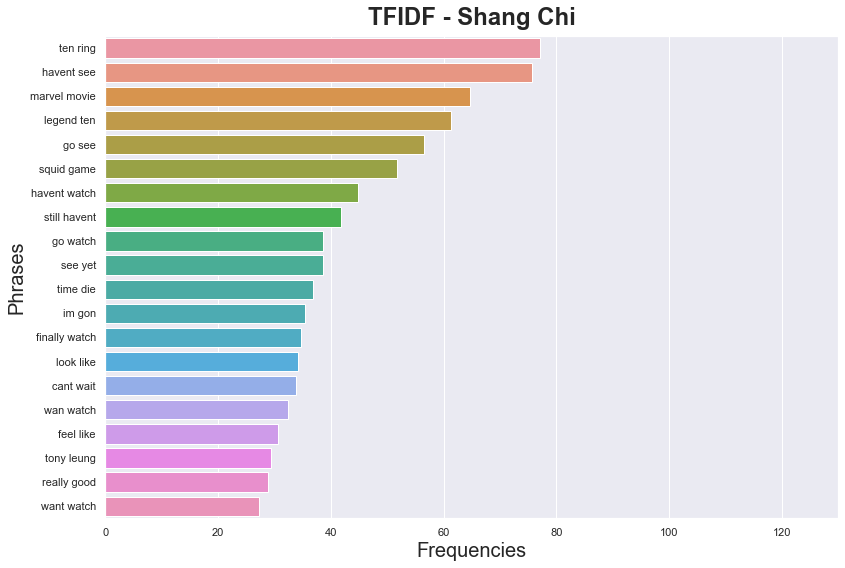

In [22]:
# Visualize frequencies
bar = sns.barplot(data=freq_tfidf.head(20), x='frequency', y='term')
bar.set_title('TFIDF - Shang Chi', fontsize=24, fontweight="bold", y=1.01)
bar.set_xlabel('Frequencies', fontsize=20)
bar.set_ylabel('Phrases', fontsize=20)
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.xlim([0, 130])
bar.figure.savefig("out/shangchi_TFIDF_graph.png",facecolor="white", transparent=False, bbox_inches='tight', dpi=300)

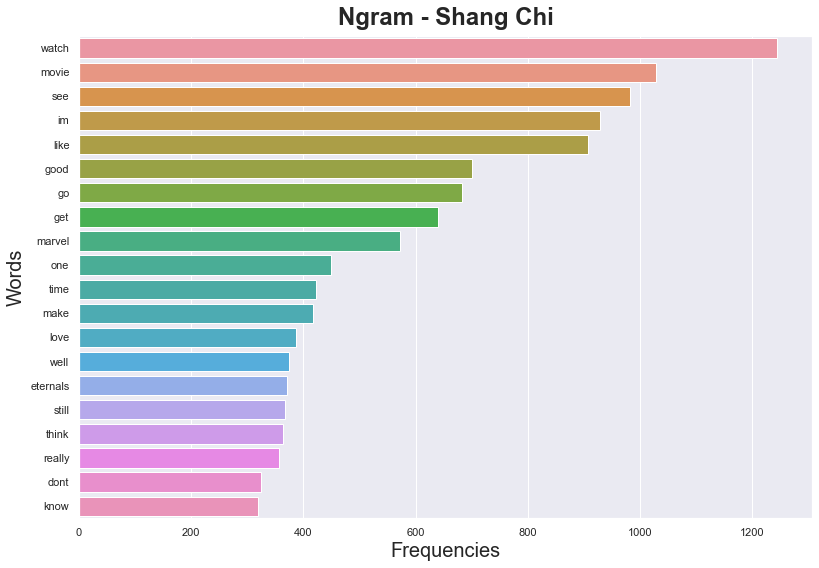

In [23]:
# Visualize frequencies
bar = sns.barplot(data=freq_ngram.head(20), x='frequency', y='term')
bar.set_title('Ngram - Shang Chi', fontsize=24, fontweight="bold", y=1.01)
bar.set_xlabel('Frequencies', fontsize=20)
bar.set_ylabel('Words', fontsize=20)
sns.set(rc={'figure.figsize':(11.7,8.27)})
#plt.xlim([0, 130])
bar.figure.savefig("out/shangchi_ngram_graph.png",facecolor="white", transparent=False, bbox_inches='tight', dpi=300)

In [24]:
def create_wordcloud(tweets, max_words=500):
    """Create a wordcloud of most common words in a set of tweets"""
    
    # Transform text for WordCloud
    tweets = tweets['cleaned_text']
    tweets = tweets.dropna()
    tweets = ' '.join(tweets)
    tweets = tweets.replace(' ', ',')
    
    # Generate wordcloud image
    wc = WordCloud(width=2000, height=1200, max_words=500, background_color="black", colormap= 'gist_heat')
    #wc = WordCloud(background_color="white", max_words=max_words, colormap='plasma')
    wc.generate(tweets)
    plt.imshow(wc, interpolation='bilinear')
    plt.title('Twitter Generated Cloud', size=22)
    plt.axis("off")
    plt.savefig("out/shangchi_wordcloud.png", transparent=True, bbox_inches='tight', dpi=300)

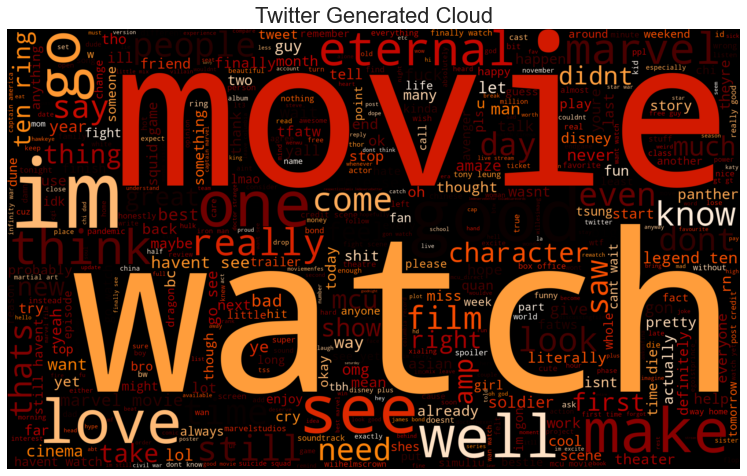

In [25]:
# Generate a wordcloud
create_wordcloud(cleaned_tweets)

## Sentiment Analysis (unused)

In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

In [ ]:
cleaned_tweets.columns

In [ ]:
cleaned_tweets = cleaned_tweets.drop([
                                      'retweet',
                                      'hashtags',
                                     ], axis=1)
cleaned_tweets

In [ ]:
cleaned_tweets['scores'] = cleaned_tweets['cleaned_text'].apply(lambda tweet: sid.polarity_scores(tweet))

In [ ]:
cleaned_tweets_new = cleaned_tweets[['scores', 'cleaned_text', 'date']]
cleaned_tweets_new

In [ ]:
cleaned_tweets_new['compound'] = cleaned_tweets_new['scores'].apply(lambda score_dict: 
                                                                    score_dict['compound'])
cleaned_tweets_new = cleaned_tweets_new.sort_values(by='date')
cleaned_tweets_new

In [ ]:
import plotly.express as px

fig = px.line(cleaned_tweets_new, 
              x='date', 
              y="compound")
fig.show()